In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
df = pd.read_csv("train.csv")


In [ ]:
df["Sex"] = df['Sex'].transform(lambda x: (x == "male").astype(int))

In [ ]:
first_class_passagers = df.loc[df['Pclass'] == 1]
second_class_passagers = df.loc[df['Pclass'] == 2]
tird_class_passagers = df.loc[df['Pclass'] == 3]


print('counting the amount of unique fares in first class')
 = pd.Series(data=first_class_passagers['Fare'])
print(first_class_fares)

In [ ]:
df['Age'] = df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('median'))
print(df['Age'].head())

In [ ]:
f_clss = (df['Pclass'] == 1)
s_clss = (df['Pclass'] == 2)
t_clss = (df['Pclass'] == 3)

wm = df['Sex'] == 0
mn = df['Sex'] == 1

first_class_w_age_mean = df.loc[f_clss & wm & (df['Age'].notna())]['Age'].mean()
first_class_m_age_mean = df.loc[f_clss & mn & (df['Age'].notna())]['Age'].mean()

second_class_w_age_mean = df.loc[s_clss & wm & (df['Age'].notna())]['Age'].mean()
second_class_m_age_mean = df.loc[s_clss & mn & (df['Age'].notna())]['Age'].mean()

third_class_w_age_mean = df.loc[t_clss & wm & (df['Age'].notna())]['Age'].mean()
third_class_m_age_mean = df.loc[t_clss & mn & (df['Age'].notna())]['Age'].mean()

print(first_class_w_age_mean, first_class_m_age_mean)
print(second_class_w_age_mean, second_class_m_age_mean)
print(third_class_w_age_mean, third_class_m_age_mean)

In [ ]:
import pandas as pd

df = pd.read_csv("train.csv")
df["Sex"] = df['Sex'].transform(lambda x: (x == "male").astype(int))
org_ages = df['Age'].values
df['Age'] = df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('median')).round()
predicted_ages = df['Age'].values

for i, (x, y) in enumerate(zip(org_ages, predicted_ages)):
    color = '\033[92m\033[1m' if x != y else '\033[30m'
    enda = "\n" if i % 10 == 0 else "    "
    print(f"{color}{y:05.2f}\033[0m", end=enda)

In [ ]:
df['FamilyNumber'] = df['SibSp'] + df['Parch']
print(df.groupby('Pclass').get_group(3)['FamilyNumber'].value_counts().sort_index())

In [ ]:
df[df['Cabin']].groupby('Pclass')['Survived'].value_counts().sort_index()

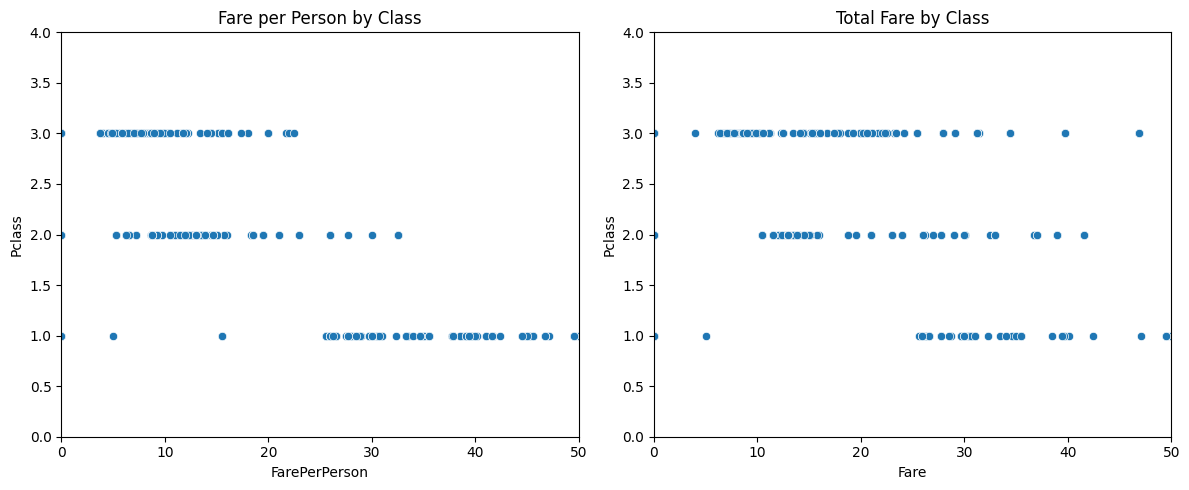

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

sns.scatterplot(x="FarePerPerson", y="Pclass", data=df, ax=axes[0])
axes[0].set_title("Fare per Person by Class")

sns.scatterplot(x="Fare", y="Pclass", data=df, ax=axes[1])
axes[1].set_title("Total Fare by Class")

axes[0].set_ylim(0, 4)   # because Pclass is usually 1, 2, 3
axes[0].set_xlim(0, 50) # adjust this depending on your data
axes[1].set_ylim(0, 4)
axes[1].set_xlim(0, 50)

plt.tight_layout()
plt.show()


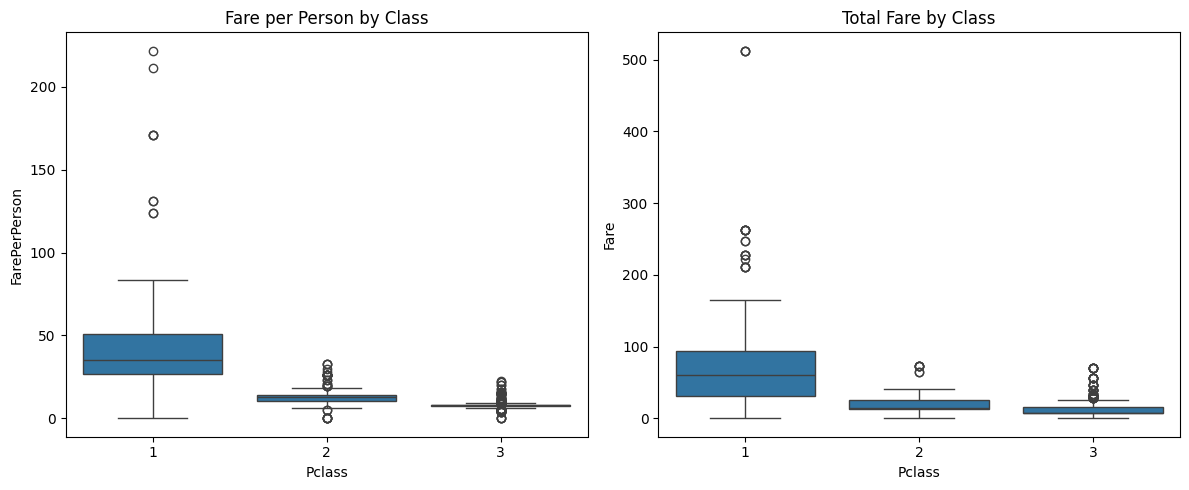

Text(0.5, 1.0, 'Distribución de precio por clase')

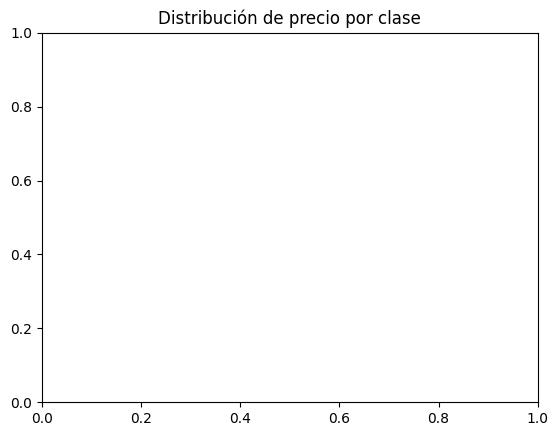

In [14]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

sns.boxplot(x="Pclass", y="FarePerPerson", data=df, ax=axes[0])
axes[0].set_title("Fare per Person by Class")

sns.boxplot(x="Pclass", y="Fare", data=df, ax=axes[1])
axes[1].set_title("Total Fare by Class")

plt.tight_layout()
plt.show()

plt.title("Distribución de precio por clase")

In [11]:
df['FamilyNumber'] = df['SibSp'] + df['Parch']
df["Cabin"] = df['Cabin'].transform(lambda x: (~x.isna()).astype(bool))
df['Embarked'] = df['Embarked'].fillna('S')
df['TicketCount'] = df['Ticket'].transform(lambda x: len(df[df['Ticket'] == x]))
df['FarePerPerson'] = df['Fare'] / df['TicketCount']

In [9]:
len(df[df['Ticket'] == 'S.O.C. 14879'])

5

In [ ]:
#model unusual titles in names
def modelate_nobiliarie_titles(nombre):
    match= re.match('\b\w+\.', nombre)
    print(match)

modelate_nobiliarie_titles('Collyer, Mrs. Harvey (Charlotte Annie Tate)')

None
